In [1]:
#using LightGraphs, GraphIO, GraphPlot
using Graphs, GraphIO, GraphPlot, SparseArrays


In [2]:
using GraphPlot

In [3]:
#gplot(g, layout=layout=circular_layout)

In [4]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    #h= bicgstabl(Lambda, v, 10)
    h=  lsmr(Lambda, v)   
    #h= Lambda \ v   
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [5]:
function tau(A, F,L,N)
    
    eta_sqaured = F/ (1- F)
    
    expect_term = 0
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
    
    alpha = dot(w_in, w_out)/L
    
    if 0 in w_in
        
        L_B=0
        
        for a in 1:N
            
            if w_in == 0
              L_B = L_B + w_out[a]  
                
            end
        end
        
        
         expect_term = 1/(2*(L/L_B -1))   
            
            
        end 
    
    
    tau = log(alpha)  - 1/(2*eta_sqaured) + expect_term
    
    
    return tau,alpha
    
    end 

tau (generic function with 1 method)

In [6]:
function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [7]:
using SparseArrays




In [185]:
using LinearAlgebra, Pseudospectra, SparseArrays
using Arpack
const number=1000
ϵ= 10^(-8)
const N=500
sizes = zeros(0)

using Random, Distributions

#d = Normal(0, 0.2)


#T_list= LinRange(0.025, 8, number)

T_list= 10 .^ (range(-2,stop=2,length=number))

#T_list= [1000000]
#For N=500, k=10 good temp
#T_list= 0.225*ones(number)
const B=0
#T_list= 0.4*ones(number)
F_list = zeros(0)

strong_list = zeros(0)

clustering_list= zeros(0)

tau_list= zeros(0)
alpha_list =zeros(0)
num_diff_list= zeros(0)

L_targ = 10*N
cond_list =zeros(0)
stop= 2*N^2
second_strong_list=zeros(0)
eig_list= zeros(0)
lap_spec_list= zeros(0)
eig_list_num_abs = zeros(0)

h_max_list= zeros(0)

gap_list = zeros(0)
scale_spec_list = zeros(0)
entropy_list=zeros(0)
nu_normal_list= zeros(0)
spacing_list=zeros(0)
ipr_list= zeros(0)
A= zeros(N,N)
h=zeros(N)
sorted=zeros(0)
corr_list= zeros(0)
diffs= zeros(0)

avg_diffs=zeros(0)
avg_diffs2=zeros(0)
h_eig_list= zeros(0)
max_cycle_list= zeros(0)

h_dist_list= zeros(0)

pseudo_spec= zeros(0)
EE_list= zeros(0)
return_list = zeros(0)

pr_ent_list=zeros(0)
#stop = 5

mean_strong_list=zeros(0)

L_targ_list= zeros(0)


targ_edges= ([5,10,15,20,30,40,50,25,35,45])*N


for a in 1:number
    
   append!(L_targ_list, targ_edges[mod(a, size(targ_edges)[1]) + 1]) 
end

println(L_targ_list)
J_max_list= zeros(0)

for n in 1:number
    
    #Uncomment to vary degrees 
    #L_targ= rand(4:20)*N
    
    #append!(L_targ_list, L_targ)
    println(n)
    spacing= zeros(N)
    
    g = SimpleDiGraph(N)
    
   
    for i in (1+B):N
        
        pick = rand(B+1:N)
        
        add_edge!(g, pick, i)
        
        
        end 
    A = (adjacency_matrix(g))
    
    L=sum(A)
    
    h = get_levels(A)
    
    
    edgelist= Int[]
    
    problist= zeros(0)
    
    edge_start= zeros(Int64,0)
    
    edge_end = zeros(Int64, 0)
    
    
    for i in 1:N
        
        for j in (B+1):N
            
            if A[i,j]!=1 && i!=j
                #Fix Array indexing here doesn't make sense. Need 2d array
                append!( edgelist, [i,j] )
                append!( edge_start, i )
                append!(edge_end, j )
                
                prob = exp(-((h[j]-h[i] -1)^2)/T_list[n]/2) + 0.00000000000001
                
                
                
                append!( problist, prob )
            end
            
            
            
            end
        
            end 
    
    prob_sum = sum(problist)
    
    loop_size= size(problist, 1)
    
    
    
    #b=0
    
    #for d in 1:size(problist, 1)
        
        #b= A[(edgelist[d])[1],(edgelist[d])[2] ] + b
    #end
       
    #println(b)
        
    count=0
    
    #println(edgelist[500])
    
    while (-L + L_targ_list[n])>0
        
        count = count + 1 
        
        prob_sum = sum(problist)
        
        random = prob_sum*(rand())
        
        
        z=0
        
        #println(prob_sum)
        for k in 1:loop_size
            
            z= z + problist[k]
            
           
            if z>=random
               
                if A[edge_start[k],edge_end[k]]==0
                
                   A[edge_start[k],edge_end[k]]=1
                    
                   problist[k]=0 
                
                    L = L +1
                    
                    break
                       
                else 
                    
                    println("Missed")
                   
                    println(A[(edgelist[k])])
                    break
                   
              
                end     
            
            end
                end
            
            if (count-stop)>=0
            
                
                
            
                break
        
            
            
                end
        
    end
        
    
    
    

 
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

eigs=  eigvals(Matrix(A))   
eigs_vecs = eigvecs(Matrix(A))
    


EE = real(sum(exp.(((eigs)))))

     
G_und= SimpleGraph(SimpleDiGraph(A))    
   
    
eigs_undir= eigvals(Matrix(adjacency_matrix(G_und))) 
EE_undir = sum(exp.(eigs_undir))
    
append!(EE_list, EE)    

returnablity= (EE - N)/(EE_undir - N)
    
    
append!(return_list, returnablity)
sorted= reverse(sort!(abs.(eigs)))
gap = (sorted[1]- sorted[2])/sorted[1]
#gap = (sorted[1]- sorted[2])    
append!(gap_list,gap)
entropy= zeros(0)
ipr= zeros(0)
h_max = maximum(h)

corr = norm(abs.(eigvecs(Matrix(transpose(A)))).*(abs.(eigs_vecs)))
    
#corr = sum(abs.(eigvecs(Matrix(transpose(A)))).*(abs.((eigs_vecs))))

append!(corr_list, corr)
    
append!(h_eig_list, abs.(eigs_vecs[:,N]) )    
append!(h_dist_list, h./h_max )     

for k in 1:N
        
        #println((sum(vec1.^2)))
        vec= abs2.(eigs_vecs[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))
        
        
        vec1= abs.(eigs_vecs[:,k])
        #vec1 = filter(!iszero, vec)
        
       
       
        #ratio= (sum(vec1.^4))/((sum(vec1.^2))^2)
        
        ratio= (sum(vec1.^4))
       
        append!(entropy,ent)
        append!(ipr,ratio)
    end  

(gaps= (zeros(ComplexF64,N,N)))   
for a in 1:N
        for b in 1:N
        
        gaps[a,b]= eigs[a] - eigs[b]
    
    
    
            end 
    end

gaps= abs.(gaps)
g= SimpleDiGraph((A))
pr = pagerank(g, 0.85, 1000, 1.0e-10)

    
    
pr = filter(!iszero, pr)
    
pr = pr*(1/(sum(pr)))
ent_pr = sum(-pr.*(log.(pr)))/N

for c in 1:N
        
        
        sorted = sort(gaps[c,:])
        spacing[c] = sorted[2]/(sorted[3]  + 0.00000000000000000000001)  
    
        end    
    
append!(spacing_list, var(spacing))    

append!(pr_ent_list,ent_pr)    

append!(entropy_list,mean(entropy))
append!(ipr_list, mean(ipr)) 
    

spec_rad=  maximum(real(eigs))   
    
scale_fac=   maximum(real(eigvals(Matrix(A)*transpose(Matrix(A)))))  
    
lap_spec = maximum(real(laplacian_spectrum(g , dir=:both)))
        
append!(lap_spec_list,lap_spec)
    
nu= sum(abs2.(eigs))/norm(A,2)^2
#A= Matrix(A)    
A= convert(Array{Float64}, A)
    
W = 1.0.*A - transpose(A)  
    
#v= exp.(-0.001.*h)
 
#v = v.*(1/norm(v))


#J = v'.*W
    
#using Random, Distributions

#d = Normal(0, 0.2)
    
    
    
    
J= W
    
#for x in 1:N
        
        #for y in 1:N
           # dist_n=rand(d) 
            #println(dist_n)
           # J[x,y] = (1 + dist_n)*J[x,y]
            
            
           # end 
   # end
    
   
append!(J_max_list, maximum(real(eigvals((Matrix(J))))))
    
strong = strongly_connected_components(g)   
comp= size(collect.(size.(strong)))[1]



for i in 1:comp
    
   
    append!(sizes, (collect.(size.(strong))[i])[1])

end


    
   
    
#append!(cond_list, cond(A,2)) 
    
#append!(pseudo_spec,psa_radius(A, ϵ)[1])
append!( eig_list, spec_rad )  
#psa_radius(A,ϵ)    
    
append!(scale_spec_list, (spec_rad/sqrt(scale_fac)))
    
append!( eig_list_num_abs , maximum(real(eigvals((Matrix(A) + transpose(Matrix(A)))/2))  ))    
   
append!(h_max_list, maximum(h))  
   
    
tau_1,alpha = tau(A, F,L,N)
append!(alpha_list, alpha)
append!(tau_list, tau_1)    
append!(nu_normal_list, nu)
    
#append!(clustering_list, global_clustering_coefficient(g))    
append!(max_cycle_list,  maxsimplecycles(g)) 
#simplecyclescount(g, ceiling = 10^6)    
#append!(max_cycle_list,  simplecyclescount(g,  10^6) )     
#simplecycleslength(g::DiGraph, ceiling = 10^6)
#println(maximum(size.(strongly_connected_components(g)))/N)    
#println(collect(sort(size.(strong), rev=true)[2]))
    
max= maximum(size.(strong))[1]/N
append!(mean_strong_list, mean(((size.(strong))[1] )  ) )
append!(strong_list, max)
    
if max<1    

append!(second_strong_list, collect(sort(size.(strong), rev=true)[2])[1]/N )
        
    
else
    
    append!(second_strong_list,0)
    
end
 
diffs= zeros(0)

#edges_1= []
#edges_2=[]
println(sum(A)/N^2)
for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
        
         
    
        append!( diffs, d )
    
       
        
    
        
    end    
   
 #num_diff=  count(p->(p>= 0), diffs)    
    
    num_diffs= sum(diffs .<= 0)/length(diffs)
    #num_diffs= 1
append!( num_diff_list, num_diffs )

#display(plot(laplacian_spectrum(g , dir=:in) ,seriestype = :scatter) )
#append!(avg_diffs2, mean(diffs.^2))
#append!(avg_diffs, mean(diffs.^3))

#println((diffs))
end

println(F_list)




[5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 12500.0, 17500.0, 22500.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0,

1
0.02
2
0.03
3
0.04
4
0.06
5
0.08
6
0.1
7
0.05
8
0.07
9
0.09
10
0.01
11
0.02
12
0.03
13
0.04
14
0.06
15
0.08
16
0.1
17
0.05
18
0.07
19
0.09
20
0.01
21
0.02
22
0.03
23
0.04
24
0.06
25
0.08
26
0.1
27
0.05
28
0.07
29
0.09
30
0.01
31
0.02
32
0.03
33
0.04
34
0.06
35
0.08
36
0.1
37
0.05
38
0.07
39
0.09
40
0.01
41
0.02
42
0.03
43
0.04
44
0.06
45
0.08
46
0.1
47
0.05
48
0.07
49
0.09
50
0.01
51
0.02
52
0.03
53
0.04
54
0.06
55
0.08
56
0.1
57
0.05
58
0.07
59
0.09
60
0.01
61
0.02
62
0.03
63
0.04
64
0.06
65
0.08
66
0.1
67
0.05
68
0.07
69
0.09
70
0.01
71
0.02
72
0.03
73
0.04
74
0.06
75
0.08
76
0.1
77
0.05
78
0.07
79
0.09
80
0.01
81
0.02
82
0.03
83
0.04
84
0.06
85
0.08
86
0.1
87
0.05
88
0.07
89
0.09
90
0.01
91
0.02
92
0.03
93
0.04
94
0.06
95
0.08
96
0.1
97
0.05
98
0.07
99
0.09
100
0.01
101
0.02
102
0.03
103
0.04
104
0.06
105
0.08
106
0.1
107
0.05
108
0.07
109
0.09
110
0.01
111
0.02
112
0.03
113
0.04
114
0.06
115
0.08
116
0.1
117
0.05
118
0.07
119
0.09
120
0.01
121
0.02
122
0.03
123
0.04
124
0.06
125


[0.022973919650833, 0.02177850465050339, 0.01712802344270801, 0.018432053687327535, 0.04020516409014964, 0.04675022210211543, 0.021519655114467524, 0.024406101447784392, 0.05693330355655116, 0.04015886384773541, 0.02434811430075477, 0.019178682022336982, 0.019935488531890085, 0.027618265380521288, 0.0355916595566838, 0.05362258158666253, 0.02430638900136577, 0.035793506826930825, 0.05711325972858946, 0.036434043097162444, 0.022442705644492706, 0.025873885833364422, 0.0216353486277028, 0.022046389800303698, 0.03857002609730257, 0.06819026219415404, 0.025840653771881907, 0.03532140189269961, 0.03923231525308639, 0.03474140495038883, 0.028834612762718183, 0.023207960999371124, 0.01970901583986653, 0.026349818879207225, 0.04464615321708978, 0.07087450599785865, 0.02088603276281022, 0.029995469903600133, 0.055664482115657575, 0.04297955639754839, 0.022547795028524054, 0.023349590975111675, 0.023782096688149082, 0.0322385574128149, 0.05274638841032685, 0.05781235964000551, 0.0266317937674088

In [186]:
#psa_radius(A, 0.0001)

In [187]:
using Plots

#histogram(diffs, xlabel= "Level Differences", ylabel="Frequency", title=(string("N=1000 k=10 F=",  string(round(F,digits = 3) ))))

#savefig("Generated_Level_distribution_high.pdf")

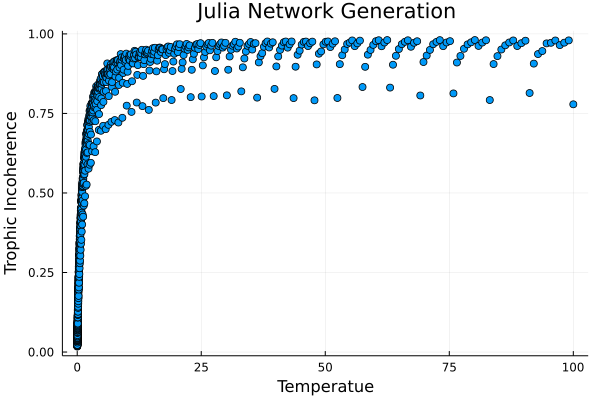

In [188]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_2.pdf")

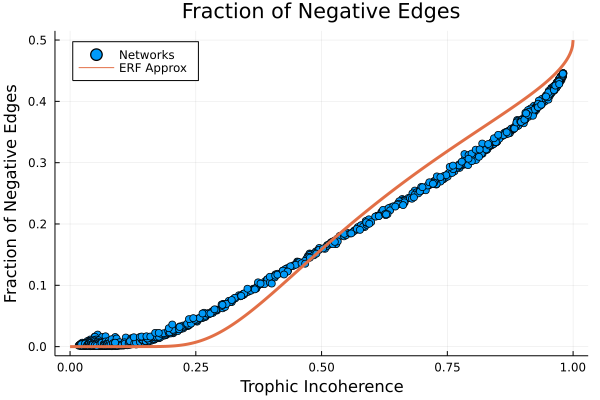

In [189]:

using Polynomials, SpecialFunctions

x=F_list

y= num_diff_list


plot(F_list, num_diff_list, seriestype = :scatter, legend = :topleft, xlabel= "Trophic Incoherence",

ylabel="Fraction of Negative Edges", title= "Fraction of Negative Edges", label= "Networks")



F_plot= LinRange(0, 1, 1000)


arg= - sqrt.(-F_plot .+1)./(F_plot*(2)) 

erf_function= 0.5*(1 .+ erf.(arg))

plot!(F_plot,  erf_function , label= "ERF Approx", lw=3)

#quadfit=Polynomials.fit(x,y,1)
#plot!(quadfit,x[1],x[end],label="Linear Fit", lw = 3)

#savefig("Error_function_approx_negative_edges_generated.pdf")


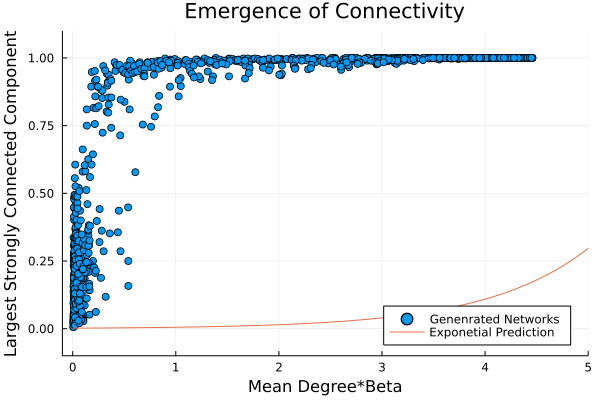

In [190]:
#plot(( -num_diff_list.^-1 .+ L_targ/N) , mean_strong_list/N,legend=false,seriestype = :scatter,ylabel="Mean Strongly Connected Component", xlabel="Mean Degree - 1/Beta",title="Emergence of Connectivity")

#plot(( num_diff_list*L_targ/N ) , mean_strong_list/N,legend=false,seriestype = :scatter,ylabel="Mean Strongly Connected Component", xlabel="Mean Degree*Beta",title="Emergence of Connectivity")


F_plot= LinRange(0, 10, 1000)


#F_plot= LinRange(0.000001, 10, 1000)

plot(( num_diff_list*L_targ/N ) , strong_list,legend=:bottomright,seriestype = :scatter,ylabel="Largest Strongly Connected Component", xlabel="Mean Degree*Beta",title="Emergence of Connectivity" ,label="Genenrated Networks")

#plot!(sign.(F_plot), F_plot .-5, ylim=(-0.1,1.1), linestyle=:dash, label="Critical Point") 
plot!(F_plot, exp.(F_plot)/N, ylim=(-0.1,1.1),xlim=(-0.1,5), label="Exponetial Prediction") 
    
    
#savefig("EXP_undershoots_Connectivity_Generated_Degree_Beta_N_100.pdf")

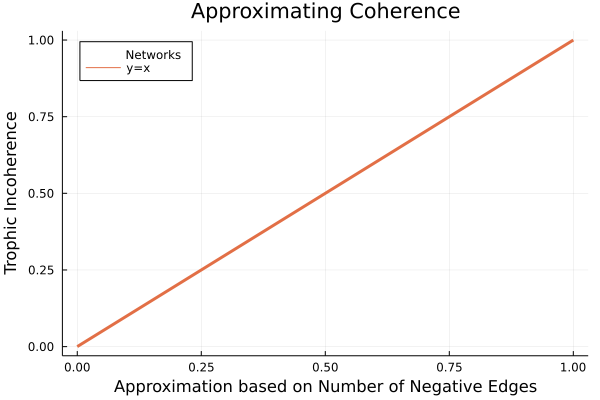

In [191]:
y= F_list

#x = 2*num_diff_list.*avg_diffs .- avg_diffs .+ 1

x =   -avg_diffs2  .+1

line= LinRange(0, 1, 1000)

plot(line,line)

plot(x, y, seriestype = :scatter, legend = legend = :topleft, ylabel= "Trophic Incoherence",

xlabel="Approximation based on Number of Negative Edges", title= "Approximating Coherence", label= "Networks")


plot!(line,line, label="y=x", lw = 3)



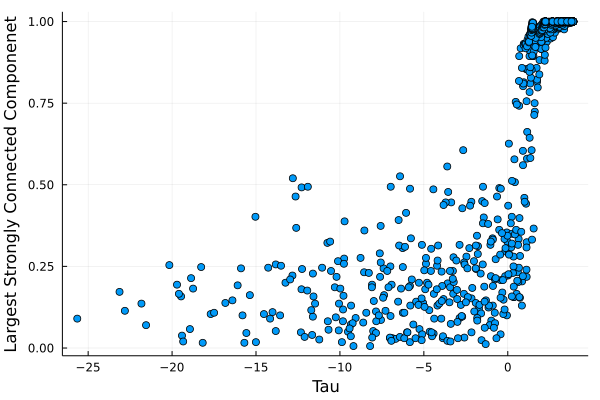

In [192]:
plot((tau_list), strong_list, seriestype = :scatter, legend=:false, ylabel="Largest Strongly Connected Componenet"

,xlabel= "Tau")
#println(strong_list)
#savefig("tau_largest_strong_component.pdf")

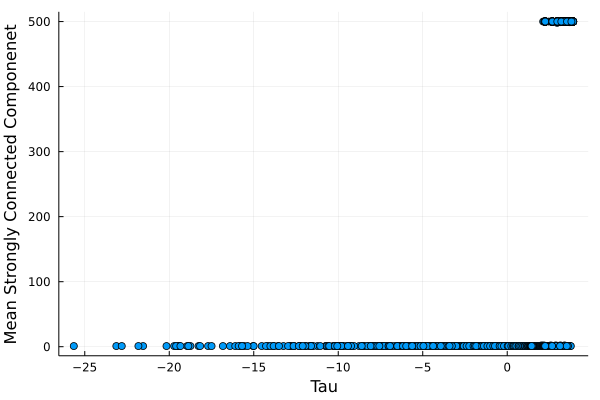

In [193]:
plot((tau_list), mean_strong_list, seriestype = :scatter, legend=:false, ylabel="Mean Strongly Connected Componenet"

,xlabel= "Tau")


#savefig("tau_mean_strong_component.pdf")

-7.433612483102372-1.8012062258478674


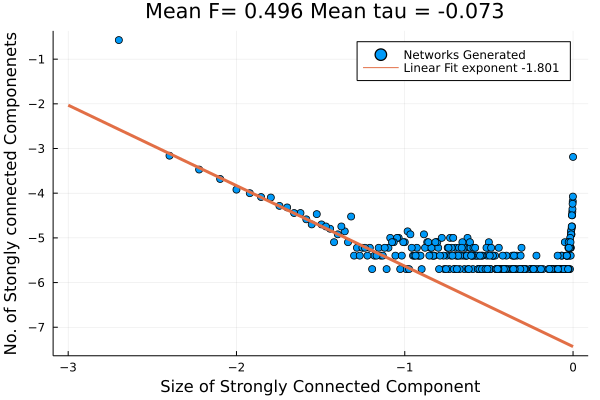

In [194]:
using StatsBase


using LaTeXStrings

F_round= round(mean(F_list),digits=3 )

tau_round= round(mean(tau_list),digits=3 )

#histogram(x , normalize = true, seriestype = :scatter,  yaxis=:log, xaxis=:log )

#using StatsBase, Plots
#hist = (StatsBase.fit(Histogram, x))
#Plots.plot((hist))

d = countmap(sizes)
#println( pweights(x))

x = collect(keys(d))/N

y= collect(values(d))/N/number

Plots.plot(log10.(x), log10.(y) , seriestype=:scatter,legend=false , label="Networks Generated",
    

ylabel= "No. of Stongly connected Componenets", xlabel="Size of Strongly Connected Component", title =" Mean F= $F_round Mean tau = $tau_round")

#line= LinRange(0.1, 1, 1000)

#quadfit=Polynomials.fit((x),(y),1)
#plot!(quadfit,x[1],x[end],label="Linear Fit", lw = 3, xlim=(1/N -0.1*(1/N) ,1.1),xaxis=:log,yaxis=:log )

using CurveFit


p = sortperm(x)

#print(x)

x = x[p]

y=  y[p]

x= x[2:30]

y=y[2:30]

a,b = linear_fit(log10.(x), log10.(y))


println(a,b)
xlim=(1/N -0.1*(1/N),1.1)

ylim= (0.0001,1)

b_round= round(b,digits=3)

plot!(log10.(line), log10.(line)*b .+a, label="Linear Fit exponent $b_round", lw = 3 , legend=true)


#savefig("GRS3_Strong_distrubution__low_tau_test_very_dependent_on_size_Tau.pdf")

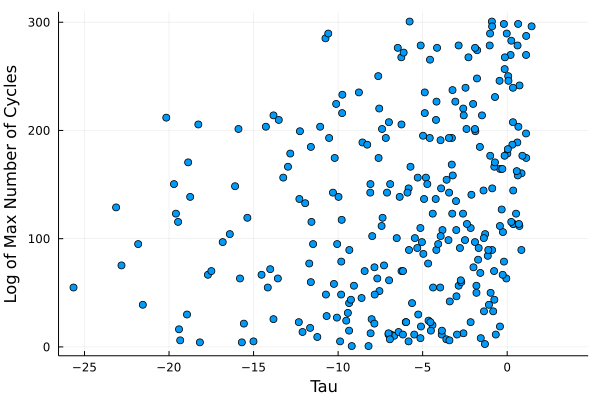

In [195]:
plot(tau_list, log10.(max_cycle_list),seriestype = :scatter,legend=false, xlabel="Tau", ylabel="Log of Max Number of Cycles")


#savefig("N_30_cycles_tau.pdf")

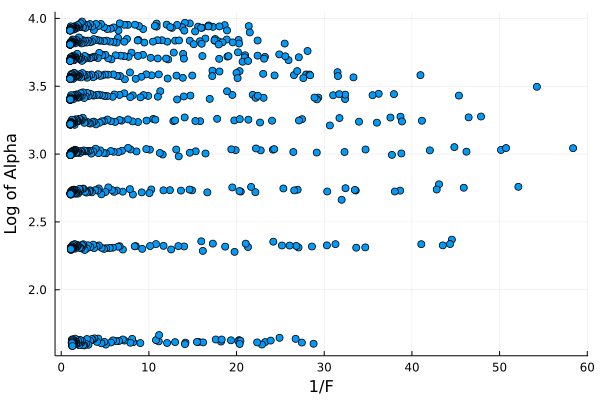

In [196]:
plot(F_list.^-1,log.(alpha_list), seriestype = :scatter, legend=false, ylabel="Log of Alpha", xlabel="1/F")

#savefig("Log_alpha_versus_1_over_F.pdf")

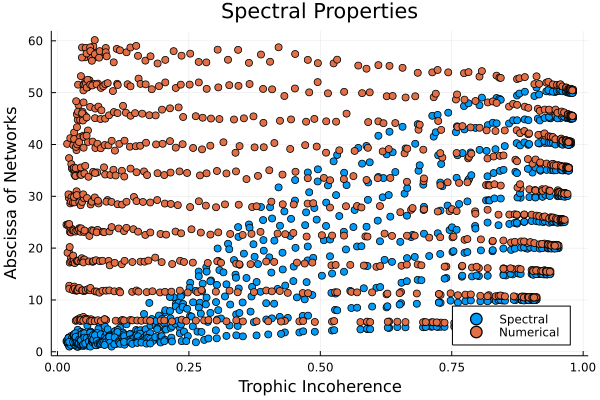

In [197]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Abscissa of Networks", title= "Spectral Properties", label= "Spectral" )

plot!(F_list, eig_list_num_abs, seriestype = :scatter, label = "Numerical")
#savefig("Abscissa_of_Networks.pdf")

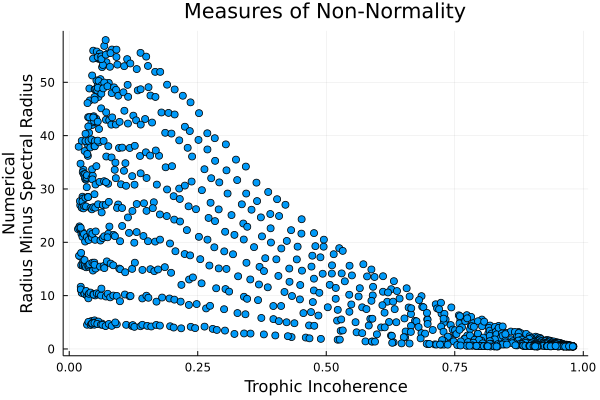

In [198]:
plot(F_list, eig_list_num_abs -eig_list , seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Numerical
Radius Minus Spectral Radius", title= "Measures of Non-Normality")
#savefig("Other_Non_normality_measure_Networks.pdf")

In [199]:
#plot(F_list, (cond_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",
    #ylabel="Conidtion Number" , yaxis=:log)

#savefig("Condition_number_N_500.png")

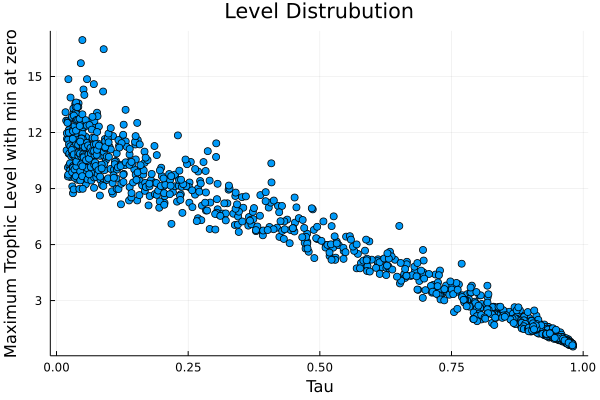

In [200]:
plot(F_list, h_max_list, seriestype = :scatter, legend = false, xlabel= "Tau",

ylabel="Maximum Trophic Level with min at zero", title= "Level Distrubution", label= "Spectral" )

#savefig("tau_Maximum_Level_Numerical_Networks.pdf")



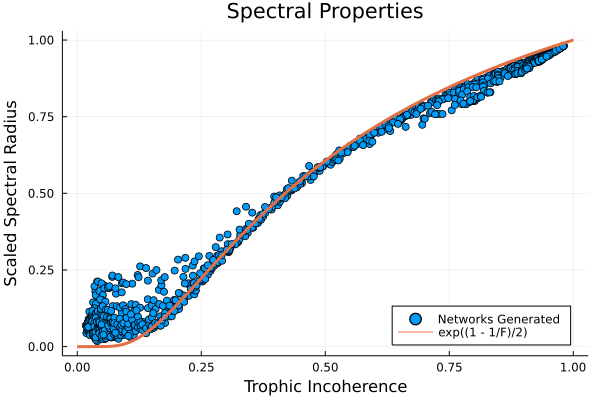

In [201]:
plot(F_list, scale_spec_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Networks Generated" )

F_plot= LinRange(0, 1, 1000)

plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("scaled_spec_radius_test.pdf")

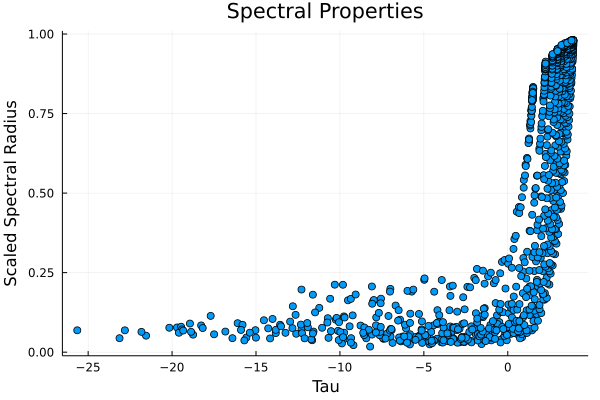

In [202]:
plot((tau_list), scale_spec_list, seriestype = :scatter,  xlabel= "Tau",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Networks Generated" ,legend=:false )

#F_plot= LinRange(0, 1, 1000)

#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("sign_tau_scaled_spec_radius.pdf")

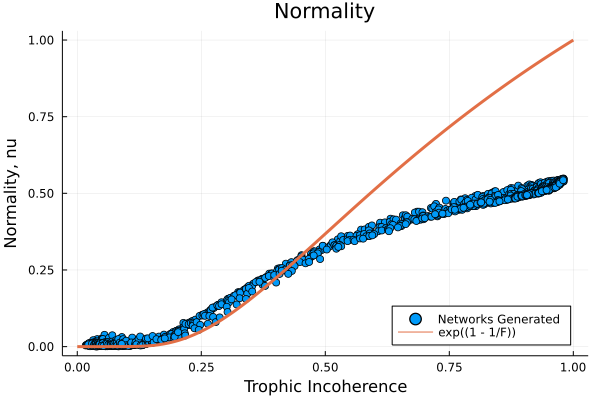

In [203]:
plot(F_list, nu_normal_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Normality, nu", title= "Normality", label= "Networks Generated" )



plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("nu_normlity_test_dense.pdf")

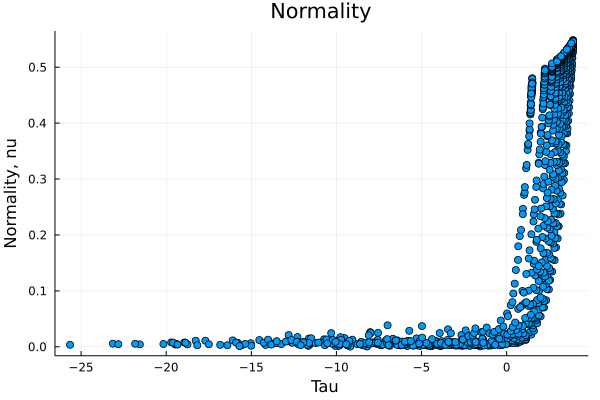

In [204]:
plot((tau_list), nu_normal_list, seriestype = :scatter, legend = :false, xlabel= " Tau",

ylabel="Normality, nu", title= "Normality", label= "Networks Generated" )



#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("normality_tau_sign.pdf")

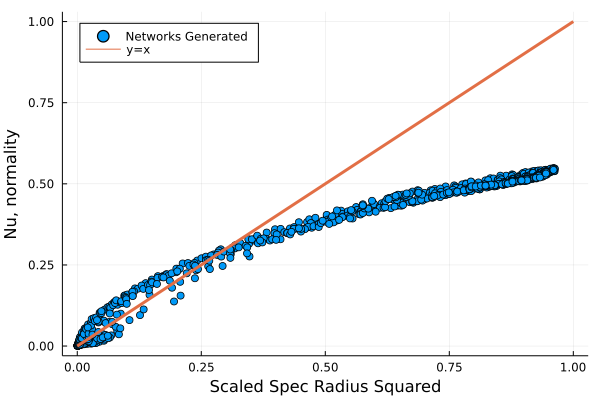

In [205]:
plot(scale_spec_list.^2 , nu_normal_list, seriestype = :scatter, label= "Networks Generated", legend = :topleft, xlabel="Scaled Spec Radius Squared"

,ylabel = "Nu, normality")

plot!(line,line, label="y=x", lw = 3)

#savefig("nu_normlity_analysis_dense.pdf")

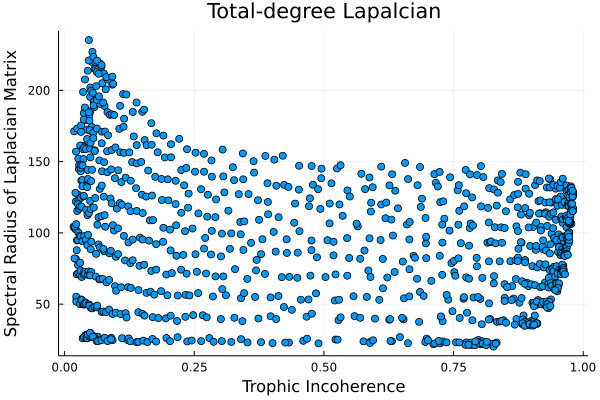

In [206]:
plot(F_list, lap_spec_list, seriestype = :scatter, legend=:false, xlabel="Trophic Incoherence", ylabel = "Spectral Radius of Laplacian Matrix", title ="Total-degree Lapalcian")


#savefig("total_lapacian_test.pdf")

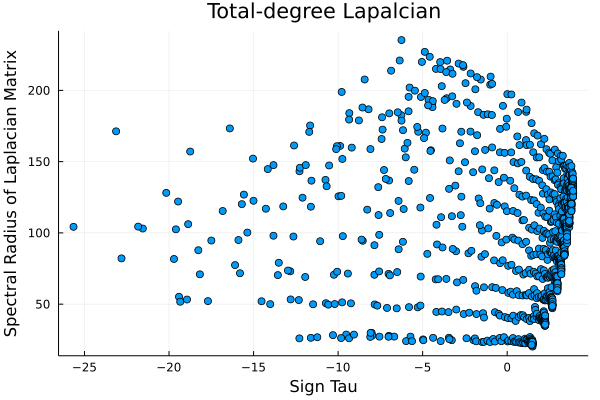

In [207]:
plot((tau_list), lap_spec_list, seriestype = :scatter, legend=:false, xlabel="Sign Tau", ylabel = "Spectral Radius of Laplacian Matrix", title ="Total-degree Lapalcian")


#savefig("sign_tau_total_lapacian_test.pdf")


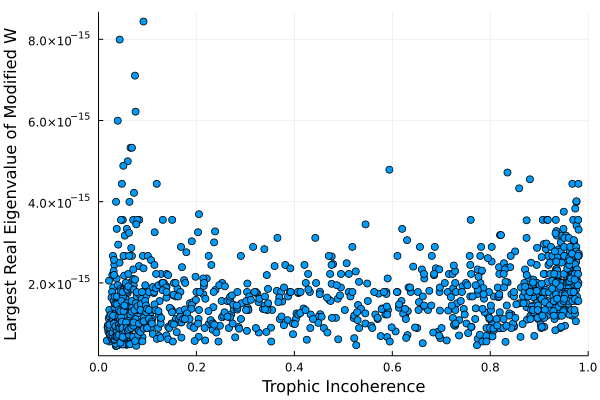

In [208]:
plot(F_list, J_max_list, seriestype = :scatter, xlims = (0,1) ,legend=:false, xlabel="Trophic Incoherence", ylabel="Largest Real Eigenvalue of Modified W")
#savefig("Modified_W.pdf")

In [209]:
pseudo_spec

plot(F_list, pseudo_spec, seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

ylabel="Pseudo Spectral Radius", )


DivideError: DivideError: integer division error

In [210]:


using LaTeXStrings

plot(F_list, ((pseudo_spec -eig_list)/ϵ), seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

ylabel=L" \frac {\rho_\epsilon(A) - \rho(A)}{\epsilon} " ,yaxis=:log )


#savefig("Pseduo_spec_data.pdf")

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(0),), b has dims (Base.OneTo(1000),), mismatch at 1")

In [211]:
using LaTeXStrings

plot(tau_list, ((pseudo_spec -eig_list)/ϵ), seriestype = :scatter, legend = :false, xlabel= "Tau",

ylabel=L" \frac {\rho_\epsilon(A) - \rho(A)}{\epsilon} " ,yaxis=:log )


#savefig("Tau_Pseduo_spec_data.pdf")

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(0),), b has dims (Base.OneTo(1000),), mismatch at 1")

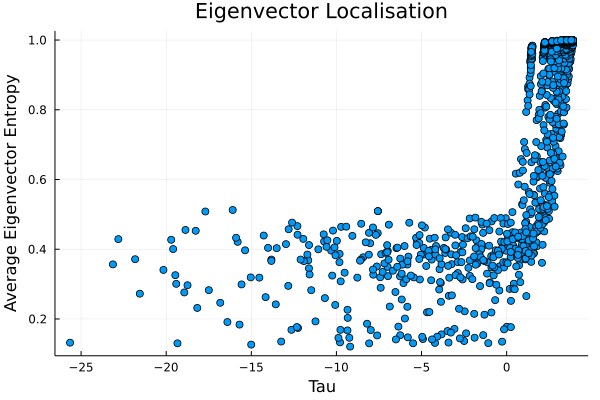

In [212]:
plot((tau_list), entropy_list/maximum(entropy_list), seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Log_Tau_Entropy_Eigenvector_localisation.pdf")

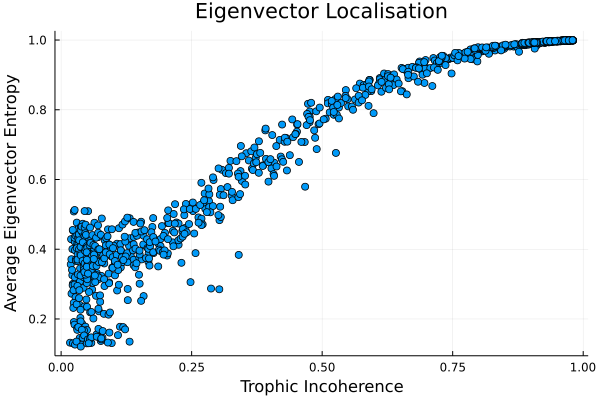

In [213]:
plot(F_list, entropy_list/maximum(entropy_list), seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Entropy_Eigenvector_localisation_N500.png")

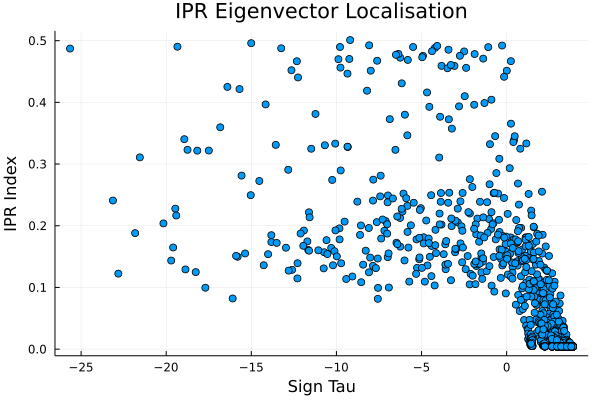

In [214]:
plot((tau_list), (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("Log_Tau_IPR_localisation_IPR.pdf")

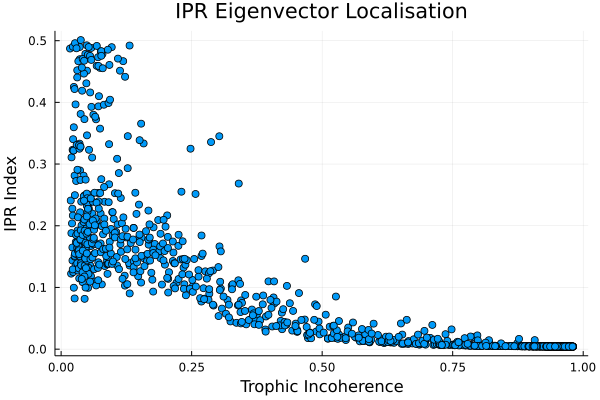

In [215]:
plot(F_list, (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("IPR_localisation_IPR_500.png")

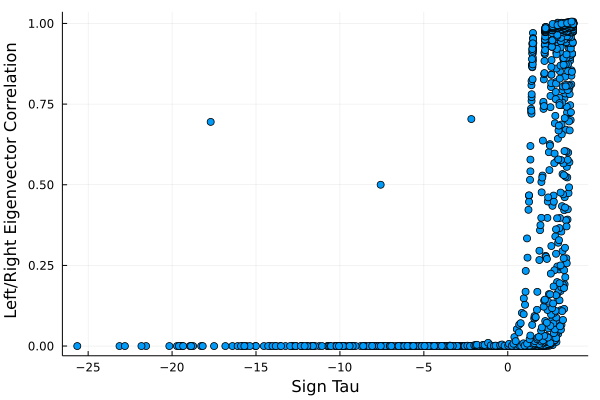

In [216]:
plot((tau_list), corr_list, seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel=" Left/Right Eigenvector Correlation" )



#savefig("Log_Tau_Eigenvector_corrleation_1.pdf")

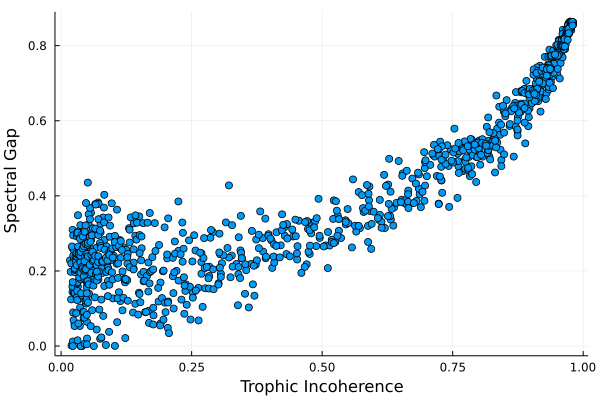

In [217]:
plot(F_list, gap_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Spectral Gap")

#savefig("Spectral_Gap_N_500_scaled_new.png")

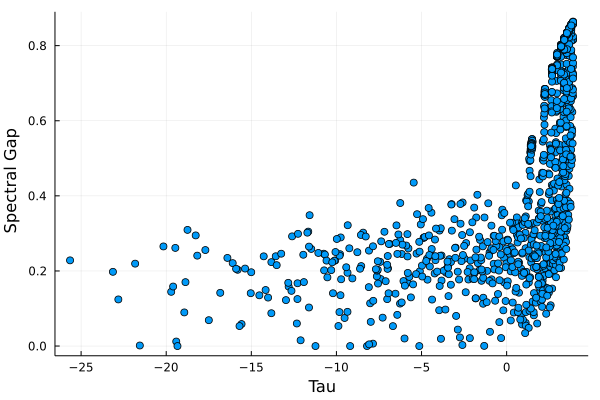

In [218]:
plot((tau_list), gap_list, seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel=" Spectral Gap")

#savefig("Sign_Tau_Spectral_Gap_N_500_scaled_new.pdf")

In [219]:
#plot(h_dist_list,h_eig_list , seriestype = :scatter,legend=false ,xlabel= "Trophic Level of Node scaled by max level",

#ylabel="  Principle Eigenvector of Node", title= "High Incoherence F approx 0.95")

#savefig("Principle_eigenvector_levels_high_incoherence.png")




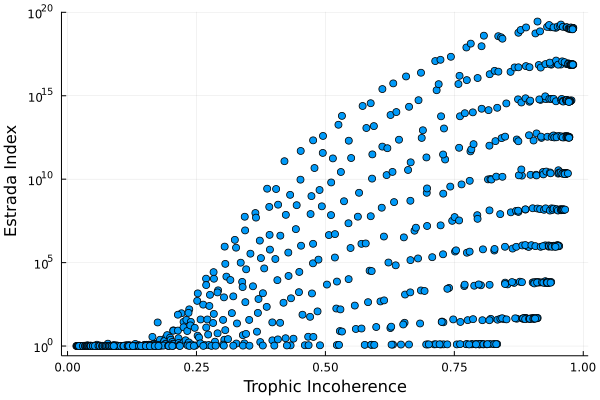

In [220]:
plot(F_list, EE_list/N, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Estrada Index", yaxis=:log)

#savefig("EE_Index_log_N_500.png")

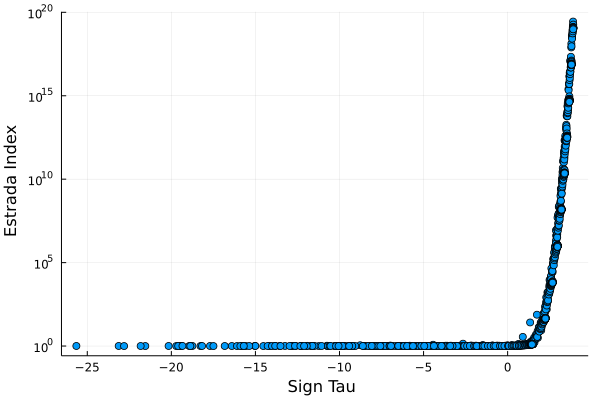

In [221]:
plot((tau_list), EE_list/N, seriestype = :scatter,legend=false ,xlabel= "Sign Tau ",

ylabel=" Estrada Index",yaxis=:log)

#savefig("Sign_Tau_Estrada_Index.pdf")

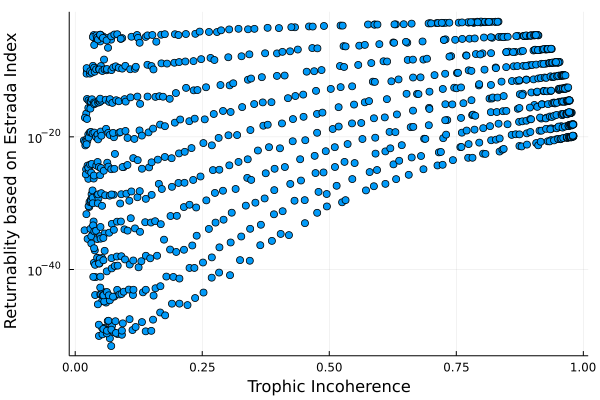

In [222]:
plot(F_list, return_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Returnablity based on Estrada Index", yaxis=:log)

#savefig("Returnablity_index_N500_k_10.pdf")

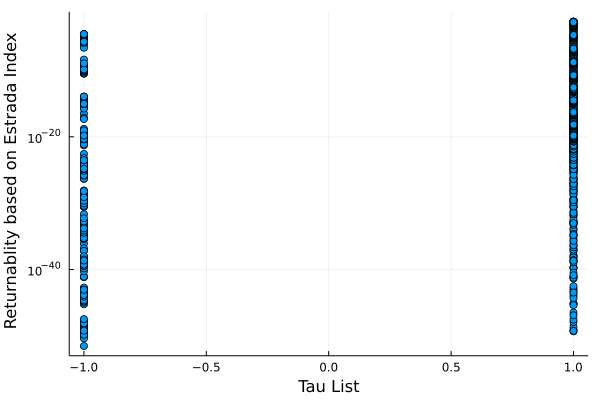

In [223]:
plot(sign.(tau_list), return_list, seriestype = :scatter,legend=false ,xlabel= "Tau List",

ylabel=" Returnablity based on Estrada Index", yaxis=:log)

#savefig("Sign_Tau_Returnablity_index.pdf")

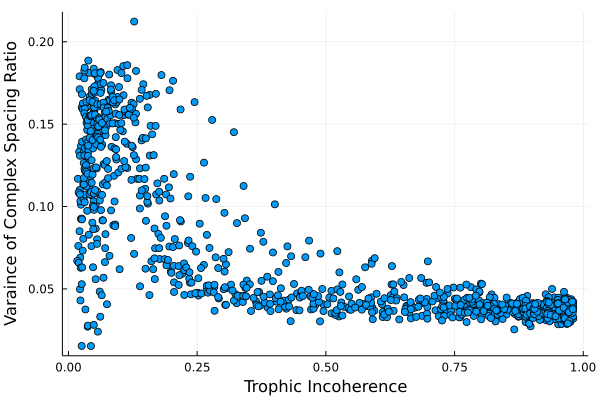

In [224]:
plot(F_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Varaince of Complex Spacing Ratio")

#savefig("Varaince_Spacing_ratio_spacing_ratio.pdf")

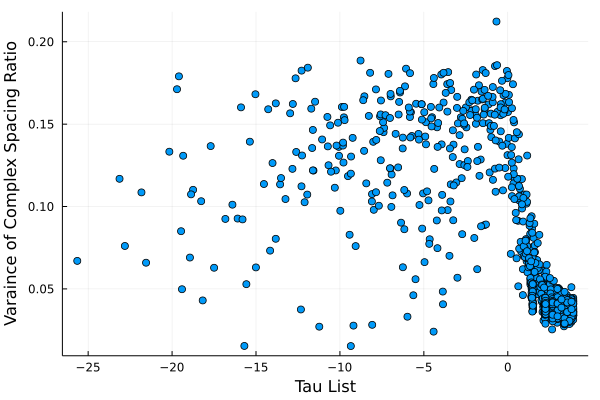

In [225]:
plot(tau_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Tau List",

ylabel="Varaince of Complex Spacing Ratio"  )

#savefig("Tau_Varaince_Spacing_ratio_spacing_ratio.pdf")

In [226]:
plot(tau_list, clustering_list,seriestype = :scatter, ylabel="Clustering Coefficient" ,xlabel="Tau",legend=false)


#savefig("Clustering_coefficent_tau.pdf")

DivideError: DivideError: integer division error

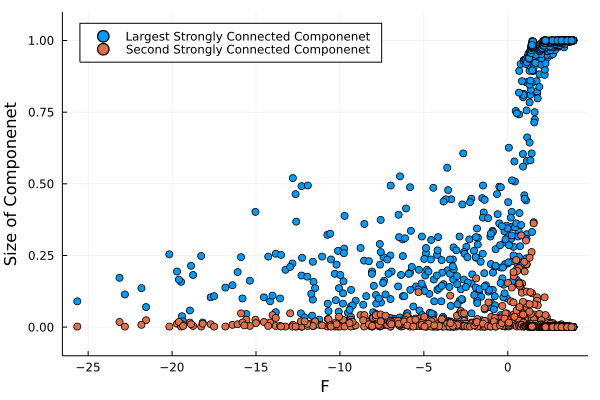

In [227]:
plot(tau_list, strong_list, seriestype = :scatter, label="Largest Strongly Connected Componenet",legend=:topleft,ylim=(-0.1,1.1))

plot!(tau_list, second_strong_list, seriestype = :scatter, label="Second Strongly Connected Componenet", xlabel="F", ylabel="Size of Componenet")

#savefig("Second_largest_component_generated_tau_N_500.pdf")


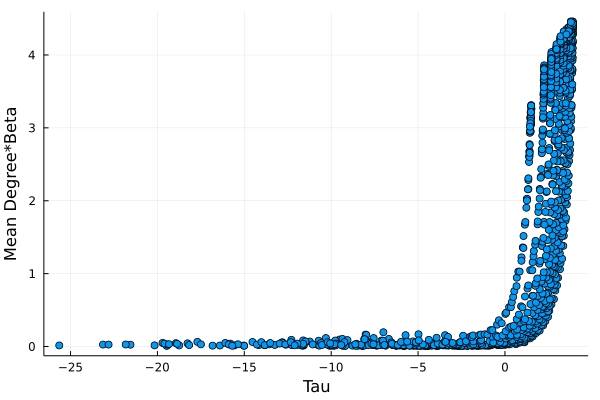

In [228]:
plot(tau_list, ( num_diff_list*L_targ/N) , seriestype = :scatter, xlabel="Tau", ylabel="Mean Degree*Beta", label=false)

#savefig("generated_mean_degree_tau.pdf")

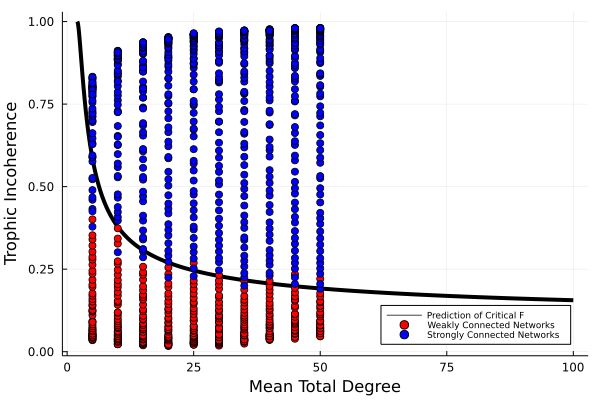

In [229]:
x_plot= LinRange(2, 100, 1000)


L_s= zeros(0)

L_w = zeros(0)

F_s =  zeros(0)

F_w =zeros(0)


for a in 1:(size(F_list)[1])
    
    
    if strong_list[a]>0.9
    
    #append!(L_s, L_targ_list[a]/N)
    append!(L_s, L_targ_list[a]/N)
    append!(F_s, F_list[a])
        
    
        else 
        
        
        
        #append!(L_w, L_targ_list[a]/N)
        append!(L_w, L_targ_list[a]/N)
        append!(F_w, F_list[a])
    end
    end 


plot(x_plot,  (1 .+ 2*((erfinv.(2*((x_plot).^-1) .-1)).^2)).^-1,lw=4, label="Prediction of Critical F", color="black", ylabel="Trophic Incoherence", xlabel="Mean Total Degree")


plot!(L_w,F_w, seriestype = :scatter, label="Weakly Connected Networks",color="red")
plot!(L_s,F_s, seriestype = :scatter, label="Strongly Connected Networks", color="blue",  legendfontsize=6, legend=:bottomright)
#savefig("Critical_F_connectivty_Varied_degree_2.pdf")

In [236]:
x_plot= LinRange(2, 55, 1000)


t_bins= 10


S_Data = Array{Vector{Float64},2}(undef, (t_bins,10))

T_Data = Array{Vector{Float64},2}(undef, (t_bins,10))
for x in 1:t_bins
    
    for y in 1:10
        
        
        S_Data[x,y] = zeros(0)
        T_Data[x,y] = zeros(0)
    end
    
end




for a in 1:(size(F_list)[1])
    
    append!(T_Data[ (floor(Int,F_list[a]*t_bins) +1), (floor(Int,L_targ_list[a]/(5*N) ))] , F_list[a])
    append!(S_Data[ (floor(Int,F_list[a]*t_bins) +1), (floor(Int,L_targ_list[a]/(5*N) ))] , strong_list[a])

    end

plot(x_plot,  (1 .+ 2*((erfinv.(2*((x_plot).^-1) .-1)).^2)).^-1,lw=4, label="Prediction of Critical F", color="black", ylabel="Trophic Incoherence", xlabel="Mean Degree")

x_data_temp= sort(targ_edges/N)


x_data=zeros(0)

y_data=zeros(0)

colour_data= zeros(0)
y_err= zeros(0)

for x in 1:t_bins
    
    for y in 1:10
        
        append!(x_data, x_data_temp[y])
        append!(y_data, mean(T_Data[x,y]))
        #println(size(T_Data[x,y]))
        append!(colour_data, mean(S_Data[x,y]))
        append!(y_err, std(S_Data[x,y])/sqrt(size(S_Data[x,y])[1]))
    end
end

plot!(x_data, y_data, seriestype = :scatter, marker_z = colour_data, legend=false, color = :viridis
, yerr= y_err,colorbar_title="Largest Strongly Connected Component" , ylim=(0,1))

#savefig("Strong_connectivty_Sampling_generated_N_500.pdf")

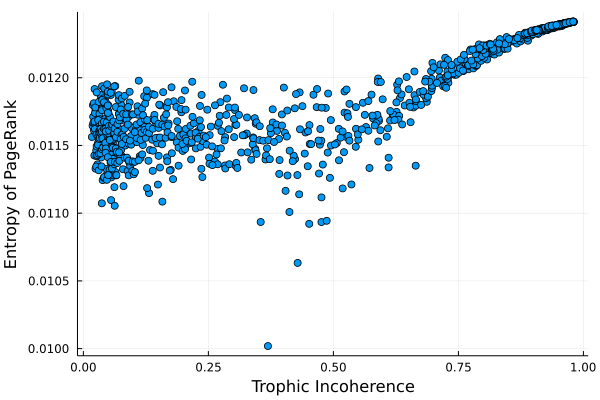

In [231]:


plot(F_list, pr_ent_list, seriestype = :scatter, xlabel="Trophic Incoherence", ylabel="Entropy of PageRank",label=false)

#savefig("PageRank_Entropy_test.pdf")
